In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import numpy as np
import pandas as pd


In [ ]:
df = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
data_train = df['train']
data_test = df['test']

In [ ]:
data_train.shape, data_test.shape

((16000, 2), (2000, 2))

In [ ]:
data_train = pd.DataFrame(data_train)
data_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
data_test = pd.DataFrame(data_test)
data_test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [ ]:
data_train['label'].unique(), data_train['label'].value_counts()

(array([0, 3, 2, 5, 4, 1]),
 label
 1    5362
 0    4666
 3    2159
 4    1937
 2    1304
 5     572
 Name: count, dtype: int64)

In [ ]:
data_train.isnull().sum(), data_test.isnull().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [ ]:
import re
# emoticon_pattern = r'(?::|;|=)(?:-)?(?:\)|\(|D|P)'
# emoticons = re.findall(emoticon_pattern, data_train['text'][186])
# print(emoticons)

In [ ]:
#%% preprocess
##########   tried keeping emoticons and punctuation like ! ? and also tried keep negate words as they will
# change the meaning of words ##########
import re
import nltk
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def preprocess(text):
    text = text.lower()
    emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    print(emoticons)
    for i, em in enumerate(emoticons):
        text = text.replace(em, f" EMOT{i} ")
        #print(text)

    text = re.sub(r'[^\w\s!?]','', text)

    for i, em in enumerate(emoticons):
        text = text.replace(f' EMOT{i} ', f" {em} ")

    tokens = word_tokenize(text)

    negWords = {'no', 'not', 'nor', 'none', 'neither','against','hardly','rarely','never'}
    words = set(stopwords.words('english'))-negWords
    tokens = [i for i in tokens if i not in words]
    #print(tokens)
    ########################### did lemmatization and not stemming as it captures root form

    wordLemm = WordNetLemmatizer()
    final_token = [wordLemm.lemmatize(i) for i in tokens]

    final_str = " ".join(final_token)
    print(final_str)
    return final_str

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
data_train['text'] = data_train['text'].apply(preprocess)
data_test['text'] = data_test['text'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Streaming output truncated to the last 5000 lines.
[]
dont know feel let recount emotional spectrum throughout minute gfb finale
[]
im feeling generous fellow bookworm kiddy even youre kid heart
[]
feel tender teenager fear may developed life long aversion pie confess tip hat julie grandmother
[]
sink deep sofa feel safe surrounded everything known long wall choc bloc painting hundred art book dip
[]
wish could take feeling sort would messy file
[]
want feel body numb
[]
spend time dating attempting date end feeling confused
[]
left feeling helpless little sad
[]
like oh thats awesome blah like reminding he interested girl like know concern make feel weird like
[]
feel like offended yawwwn
[]
went bed woke without fever horrible headache sore throat still ear feeling plugged aching
[]
feel fearful dont know going happen next course recovering
[]
grew feel like knew parent would disturbed
[]
feel hesitant want put much stock possibility maybe today mark end hard year start one might bet

In [ ]:
data_train.head()


,text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3


In [ ]:
data_test.head()

,text,label
0,im feeling rather rotten im not ambitious right,0
1,im updating blog feel shitty,0
2,never make separate ever want feel like ashamed,0
3,left bouquet red yellow tulip arm feeling slig...,1
4,feeling little vain one,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_bagOfWords = cv.fit_transform(data_train['text'])
X_test_bagOfWords= cv.transform(data_test['text'])
vocab = cv.get_feature_names_out()
print(f"Features: {vocab} and len: {len(vocab)}")
#######getting only 100 features using chi sq

Features: ['aa' 'aaaaaaand' 'aaaaand' ... 'zum' 'zumba' 'zz'] and len: 13466


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selectBest = SelectKBest(chi2, k=100)
X_train_bagOfWords_select = selectBest.fit_transform(X_train_bagOfWords, data_train['label'])
X_test_bagOfWords_select = selectBest.transform(X_test_bagOfWords)
#selectedFeatureNamesBow = selectBest.get_feature_names_out()
#print(f'Features: {selectedFeatureNamesBow}')
selected_indicesBow = selectBest.get_support(indices=True)
selectedFeaturesBow = [vocab[i] for i in selected_indicesBow]
#print(selectedFeaturesBow)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_v = TfidfVectorizer()
X_train_tfIdf = tf_idf_v.fit_transform(data_train['text'])
X_test_tfIdf = tf_idf_v.transform(data_test['text'])

vocab_tfidf = tf_idf_v.get_feature_names_out()
print(f"Length of features: {len(vocab_tfidf)}")
#################selecting top 100 features
selectBest_tfIdf = SelectKBest(chi2, k=100)
X_train_tfIdf_selectBest = selectBest_tfIdf.fit_transform(X_train_tfIdf, data_train['label'])
X_test_tfIdf_selectBest = selectBest_tfIdf.transform(X_test_tfIdf)
selected_tfidf_idx = selectBest_tfIdf.get_support(indices=True)

selected_features_tfidf = [vocab_tfidf[i] for i in selected_tfidf_idx]

print(f'Selected features TF-IDF: {selected_features_tfidf}')


Length of features: 13466
Selected features TF-IDF: ['accepted', 'afraid', 'agitated', 'amazed', 'amazing', 'angry', 'annoyed', 'anxious', 'apprehensive', 'beloved', 'bitchy', 'bitter', 'bothered', 'caring', 'cold', 'compassionate', 'confused', 'cranky', 'curious', 'dangerous', 'dazed', 'delicate', 'disgusted', 'dissatisfied', 'distracted', 'distraught', 'distressed', 'doubtful', 'envious', 'fearful', 'fond', 'frantic', 'frightened', 'fucked', 'funny', 'gentle', 'greedy', 'grumpy', 'hesitant', 'horny', 'hot', 'impatient', 'impressed', 'indecisive', 'insecure', 'insulted', 'intimidated', 'irritable', 'irritated', 'jealous', 'liked', 'longing', 'loved', 'lovely', 'loving', 'loyal', 'mad', 'naughty', 'nervous', 'nostalgic', 'offended', 'overwhelmed', 'paranoid', 'passionate', 'petty', 'pissed', 'pressured', 'rebellious', 'reluctant', 'resentful', 'restless', 'romantic', 'rude', 'rushed', 'scared', 'selfish', 'shaken', 'shaky', 'shocked', 'shy', 'skeptical', 'strange', 'stubborn', 'stunned

In [ ]:
#%% get number of features which are in both bag of words and tf-idf for comparision
common_features = [i for i in selected_features_tfidf if i in selectedFeaturesBow]
print(f'Common Features: {common_features} and length of common features: {len(common_features)}')
########only 4 words are different in tf-id and bag of words else all words are similar
#chi scores
bagOfWords_Scores = selectBest.scores_[selected_indicesBow]
tfIdf_Scores = selectBest_tfIdf.scores_[selected_tfidf_idx]
bow_features_df = pd.DataFrame({
    'Feature': selectedFeaturesBow,
    'Chi2 Score': bagOfWords_Scores
}).sort_values('Chi2 Score', ascending=False)

tfidf_features_df = pd.DataFrame({
    'Feature': selected_features_tfidf,
    'Chi2 Score': tfIdf_Scores
}).sort_values('Chi2 Score', ascending=False)

print("\nBag of words features by importance:")
print(bow_features_df.head(10))

print("\nTF-IDF features by importance:")
print(tfidf_features_df.head(10))

Common Features: ['accepted', 'afraid', 'agitated', 'amazed', 'amazing', 'angry', 'annoyed', 'anxious', 'apprehensive', 'beloved', 'bitchy', 'bitter', 'bothered', 'caring', 'cold', 'compassionate', 'cranky', 'curious', 'dangerous', 'dazed', 'delicate', 'disgusted', 'dissatisfied', 'distracted', 'distressed', 'envious', 'fearful', 'fond', 'frantic', 'frightened', 'fucked', 'funny', 'gentle', 'greedy', 'grumpy', 'hesitant', 'horny', 'hot', 'impatient', 'impressed', 'insecure', 'insulted', 'intimidated', 'irritable', 'irritated', 'jealous', 'liked', 'longing', 'loved', 'lovely', 'loving', 'loyal', 'mad', 'naughty', 'nervous', 'nostalgic', 'offended', 'overwhelmed', 'paranoid', 'passionate', 'petty', 'pissed', 'pressured', 'rebellious', 'reluctant', 'resentful', 'restless', 'romantic', 'rude', 'rushed', 'scared', 'selfish', 'shaken', 'shaky', 'shocked', 'shy', 'skeptical', 'strange', 'stubborn', 'stunned', 'supportive', 'surprised', 'suspicious', 'sweet', 'sympathetic', 'tender', 'terrifie

In [ ]:
import gensim.downloader as api
from tqdm import tqdm

def sentence_embedding_word2vec(text, word2vec_pretrained_model):
    words = text.split()
    vector = []
    for wrd in words:
        if wrd in word2vec_pretrained_model.key_to_index:
            vector.append(word2vec_pretrained_model[wrd])

    if len(vector)==0:
        return np.zeros(300) ########since my embedding size is  for the pretrained model word2vec 300

    return np.mean(vector, axis=0)#########could have taken weighted avg using tf-idf



##########train and test process
word2vec_pretrained_model = api.load("word2vec-google-news-300")

allWords = 0
foundWords = 0
####training data embeddings
word2vec_train_embedding = []
word2vec_test_embedding = []



for text in tqdm(data_train['text']):
    words = text.split()
    allWords+=len(words)
    foundWords+=sum(1 for i in words if i in word2vec_pretrained_model.key_to_index)

    embedding = sentence_embedding_word2vec(text,word2vec_pretrained_model)
    word2vec_train_embedding.append(embedding)

word2vec_train_embedding = np.array(word2vec_train_embedding)
print(word2vec_train_embedding)
###########test embedding

for text in tqdm(data_test['text']):
    embedding = sentence_embedding_word2vec(text,word2vec_pretrained_model)
    word2vec_test_embedding.append(embedding)

word2vec_test_embedding = np.array(word2vec_test_embedding)
print(word2vec_test_embedding)

print(f'Shape of embeddings train: {word2vec_train_embedding.shape} and test: {word2vec_test_embedding.shape}')



[==================================================] 100.0% 1662.8/1662.8MB downloaded


100%|██████████| 16000/16000 [00:01<00:00, 11482.90it/s]


[[-0.08935547  0.1592102   0.08349609 ... -0.08615112 -0.05517578
  -0.04296875]
 [ 0.0921224   0.0149197  -0.00145128 ... -0.00146484  0.10072157
  -0.04268392]
 [ 0.03365653  0.05608913 -0.08511788 ... -0.1064366  -0.02451869
   0.04464286]
 ...
 [-0.0045166   0.11805725 -0.05789185 ... -0.06834412  0.08104897
  -0.09924316]
 [-0.06624349  0.03829956  0.0080897  ... -0.14293416  0.04222552
  -0.05721029]
 [ 0.07548014  0.01563517 -0.04288737 ... -0.09665934  0.07698568
  -0.02636719]]


100%|██████████| 2000/2000 [00:00<00:00, 13687.46it/s]


[[ 0.04742432  0.05375671  0.04092407 ... -0.04138184  0.04475403
   0.02157593]
 [-0.01015625  0.02590332 -0.06221771 ... -0.07039795 -0.00693359
   0.0222168 ]
 [-0.03296661  0.01151276  0.02413368 ... -0.07289886 -0.00463867
  -0.10366821]
 ...
 [ 0.04406738  0.02855573  0.00373186 ...  0.01109968  0.07579422
  -0.11021205]
 [ 0.00196669  0.05872599 -0.07618544 ... -0.00657823  0.07147895
  -0.02471246]
 [ 0.018912    0.05220032 -0.00716019 ... -0.06419373  0.02960205
  -0.02836323]]
Shape of embeddings train: (16000, 300) and test: (2000, 300)


In [ ]:
#####download and load glove vector embeddings
import os
import requests
import zipfile

def download_load_glove_vectors():
  if not os.path.exists('models'):
        os.makedirs('models')
  glove_url = "https://nlp.stanford.edu/data/glove.6B.zip"
  zip_path = "models/glove.6B.zip"
  glove_path = "models/glove.6B.100d.txt"
  if not os.path.exists(zip_path) and not os.path.exists(glove_path):
    response = requests.get(glove_url, stream=True)
    total_size = int(response.headers.get('content-length', 0))
    with open(zip_path, 'wb') as f:
      for chunk in tqdm(response.iter_content(chunk_size=8192),
                             total=total_size//8192, unit='KB'):
        f.write(chunk)
######not loading data at once, rather loading in chunks, http takes in 8KB=8192 chunks

  if not os.path.exists(glove_path):
          try:
              #print(f"Extracting GloVe vectors from {zip_path}...")
              import zipfile
              with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                for file in zip_ref.namelist():
                  if file.endswith("glove.6B.100d.txt"):
                    source = zip_ref.open(file)
                    target = open(glove_path, "wb")
                    with source, target:
                      target.write(source.read())
                      #print(f"Extracted {file} to {glove_path}")
                      break
          except zipfile.BadZipFile:
            print("Error: The ZIP file appears to be corrupted.")
            os.remove(zip_path)
            return None, None
          except Exception as e:
              print(f"Error extracting file: {e}")
              return None, None

  if not os.path.exists(glove_path):
    print("Error: Failed to extract the GloVe vectors file.")
    return None, None

  # if os.path.exists(zip_path) and not os.path.exists(glove_path):
  #       with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  #           zip_ref.extractall("models")

######loading Glove, splitting each line getting words
  glove_model = {}
  embed_dimen = None
  with open(glove_path, 'r', encoding='utf-8') as f:
        for line in tqdm(f):
            values = line.split()
            #print(f" Glove values: {values}")
            word = values[0]

            vector = np.asarray(values[1:], dtype='float32')

            if embed_dimen is None:
                embed_dimen = len(vector)

            glove_model[word] = vector
  return glove_model, embed_dimen


def sentence_embedding_glove(text, glove_model, embed_dimen):
    words = text.split()
    vector = []
    for wrd in words:
        if wrd in glove_model:
            vector.append(glove_model[wrd])

    if len(vector)==0:
        return np.zeros(embed_dimen)

    return np.mean(vector, axis=0)

###########processing training and test sets
glove_model, embed_dimen = download_load_glove_vectors()
allWords = 0
foundWords = 0
####training data embeddings
glove_train_embedding = []
glove_test_embedding = []



for text in tqdm(data_train['text']):
    words = text.split()
    allWords+=len(words)
    foundWords+=sum(1 for i in words if i in glove_model)

    embedding = sentence_embedding_glove(text,glove_model, embed_dimen)
    glove_train_embedding.append(embedding)

glove_train_embedding = np.array(glove_train_embedding)
#print(glove_train_embedding)
###########test embedding

for text in tqdm(data_test['text']):
    embedding = sentence_embedding_glove(text,glove_model, embed_dimen)
    glove_test_embedding.append(embedding)

glove_test_embedding = np.array(glove_test_embedding)
#print(glove_test_embedding)

coverage = (foundWords / allWords) * 100 if allWords > 0 else 0
print(f"Coverage of Glove embeddings: {coverage:.2f}%")

print(f'Shape of embeddings train: {glove_train_embedding.shape} and test: {glove_test_embedding.shape}')


105247KB [06:23, 274.41KB/s]                            
400000it [00:12, 32937.81it/s]
100%|██████████| 2000/2000 [00:00<00:00, 32155.54it/s]

Coverage of Glove embeddings: 99.17%
Shape of embeddings train: (16000, 100) and test: (2000, 100)


In [ ]:
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer("paraphrase-MiniLM-L6-v2")
embedding_dim = bert_model.get_sentence_embedding_dimension()
sbert_train_embeddings = bert_model.encode(data_train['text'].tolist(),
                                 show_progress_bar=True,
                                 batch_size=32)
sbert_test_embeddings = bert_model.encode(data_test['text'].tolist(),
                                 show_progress_bar=True,
                                 batch_size=32)

print(f"Train embedding shape: {sbert_train_embeddings.shape} and Test embedding shape: {sbert_test_embeddings.shape}")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/500 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Train embedding shape: (16000, 384) and Test embedding shape: (2000, 384)



===== Training and evaluating classifiers for Bag of Words =====

Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest accuracy: 0.5920

Training SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM accuracy: 0.5555

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost accuracy: 0.5915

Best model for Bag of Words: Random Forest with accuracy 0.5920


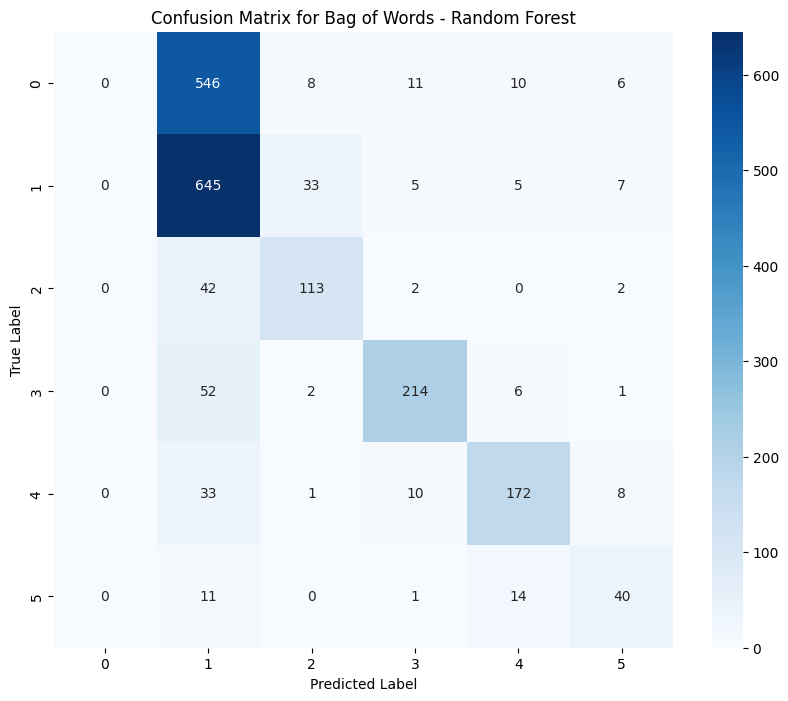


===== Training and evaluating classifiers for TF-IDF =====

Training Random Forest...
Random Forest accuracy: 0.5825

Training SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM accuracy: 0.5490

Training XGBoost...
XGBoost accuracy: 0.5935

Best model for TF-IDF: XGBoost with accuracy 0.5935


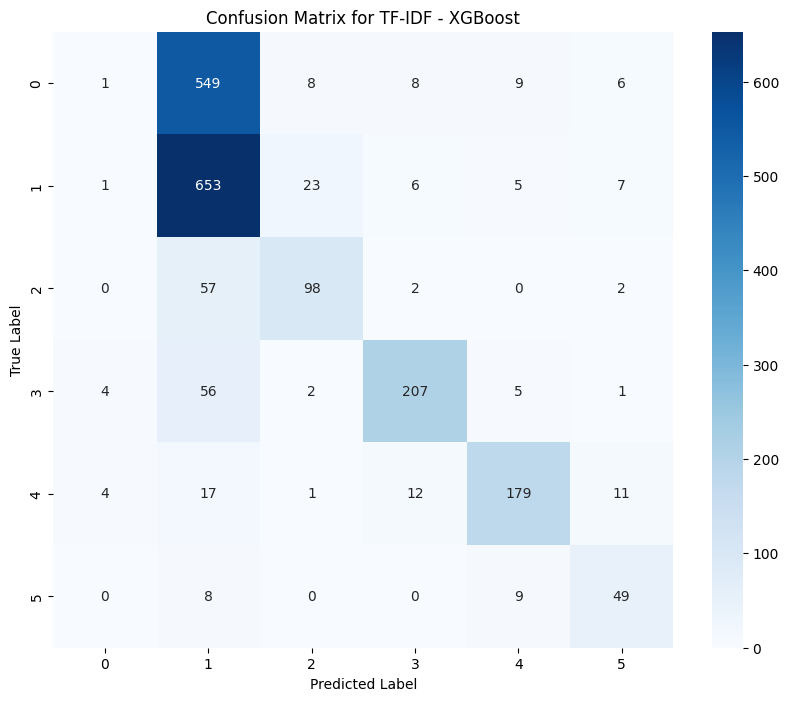


===== Training and evaluating classifiers for Word2Vec =====

Training Random Forest...
Random Forest accuracy: 0.5790

Training SVM...
SVM accuracy: 0.6770

Training XGBoost...
XGBoost accuracy: 0.6890

Best model for Word2Vec: XGBoost with accuracy 0.6890


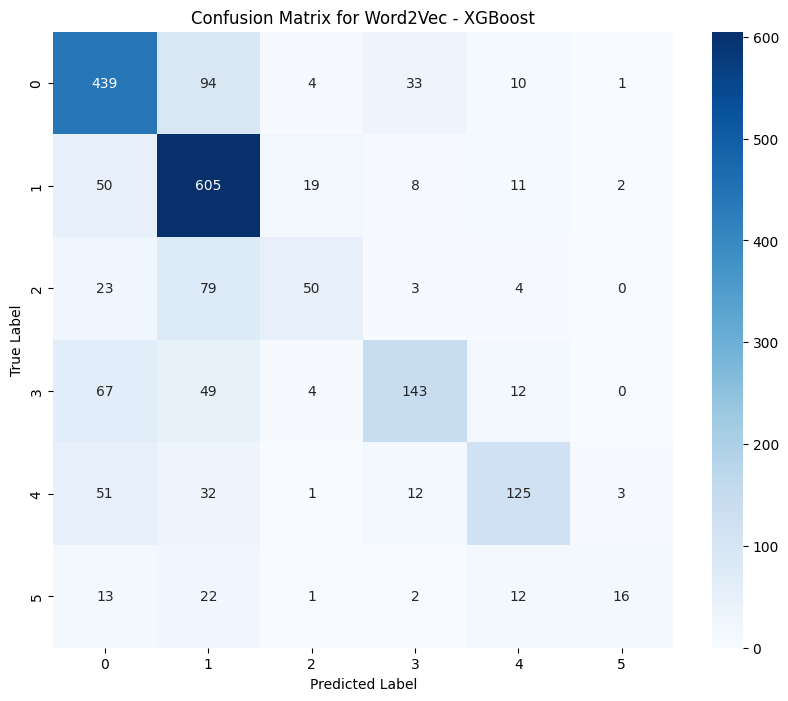


===== Training and evaluating classifiers for GloVe =====

Training Random Forest...
Random Forest accuracy: 0.5295

Training SVM...
SVM accuracy: 0.5290

Training XGBoost...
XGBoost accuracy: 0.6030

Best model for GloVe: XGBoost with accuracy 0.6030


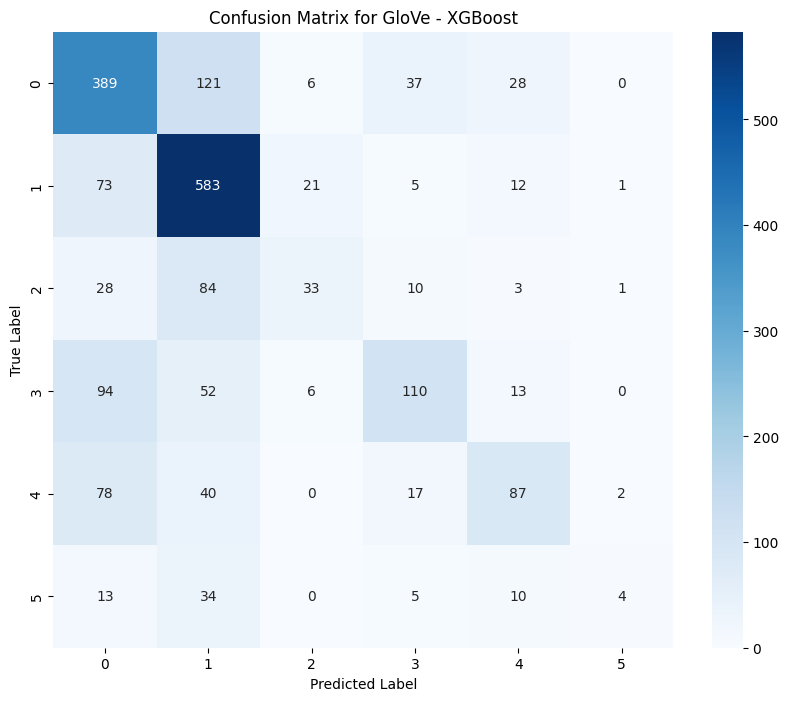


===== Training and evaluating classifiers for Sentence-BERT =====

Training Random Forest...
Random Forest accuracy: 0.6155

Training SVM...
SVM accuracy: 0.6270

Training XGBoost...
XGBoost accuracy: 0.6695

Best model for Sentence-BERT: XGBoost with accuracy 0.6695


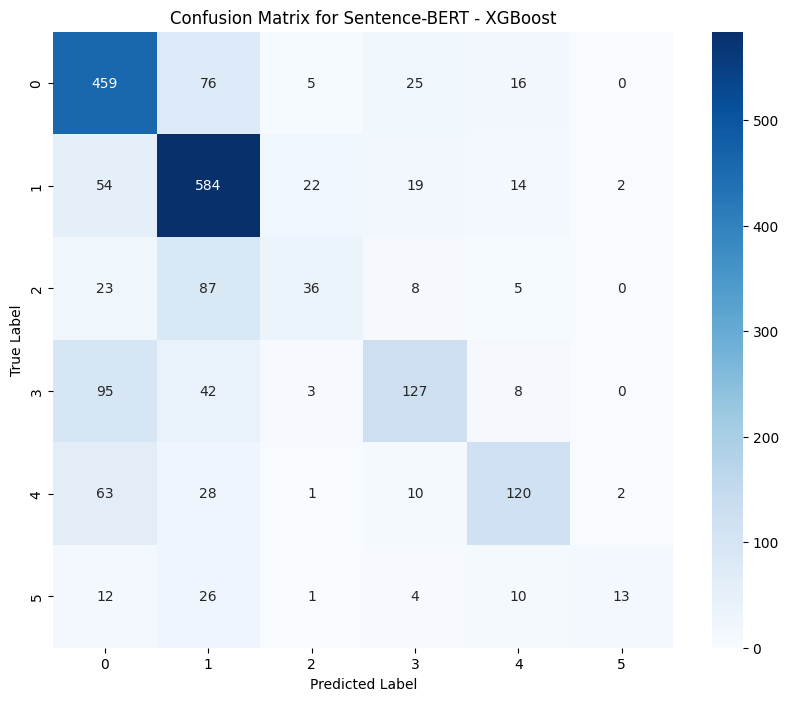


===== Overall Results Summary =====
       Embedding     Best Model  Accuracy
2       Word2Vec        XGBoost    0.6890
4  Sentence-BERT        XGBoost    0.6695
3          GloVe        XGBoost    0.6030
1         TF-IDF        XGBoost    0.5935
0   Bag of Words  Random Forest    0.5920


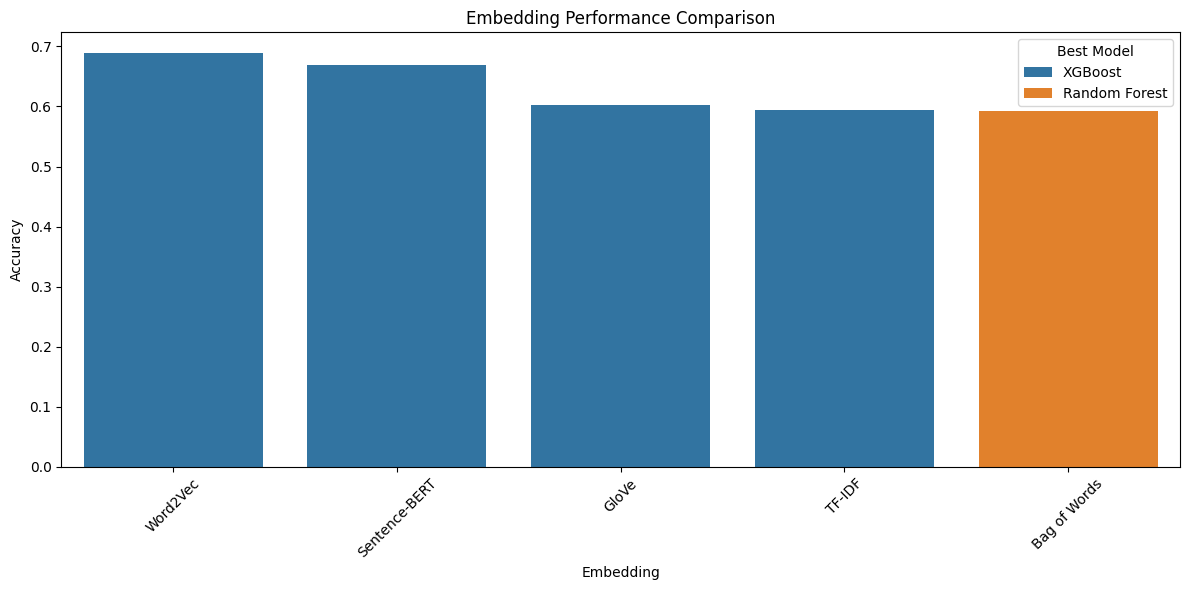


===== Best Overall Model =====
Embedding: Word2Vec
Model: XGBoost
Accuracy: 0.6890

===== Detailed Classification Report for Best Model =====
              precision    recall  f1-score   support
0              0.682737  0.755594  0.717320   581.000
1              0.686720  0.870504  0.767766   695.000
2              0.632911  0.314465  0.420168   159.000
3              0.711443  0.520000  0.600840   275.000
4              0.718391  0.558036  0.628141   224.000
5              0.727273  0.242424  0.363636    66.000
accuracy       0.689000  0.689000  0.689000     0.689
macro avg      0.693246  0.543504  0.582979  2000.000
weighted avg   0.689570  0.689000  0.673551  2000.000


In [ ]:
#%% Randomforest SVM and XGBoost classifier taken and random state=42
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def train_evaluate_classifiers(X_train, X_test, y_train, y_test, embedding_name):

    classifiers = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='linear', probability=True, random_state=42,class_weight='balanced'),
        'XGBoost': XGBClassifier(random_state=42)
    }

    results = {}
    best_accuracy = 0
    best_model_name = None

    print(f"\n===== Training and evaluating classifiers for {embedding_name} =====")

    for name, clf in classifiers.items():
        print(f"\nTraining {name}...")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)


        #accuracy
        accuracy = accuracy_score(y_test, y_pred)



        #all results
        results[name] = {
            'model': clf,
            'predictions': y_pred,
            'accuracy': accuracy,
            'report': classification_report(y_test, y_pred, output_dict=True)
        }

        print(f"{name} accuracy: {accuracy:.4f}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = name

    print(f"\nBest model for {embedding_name}: {best_model_name} with accuracy {best_accuracy:.4f}")



    #####creating confusion matrix to find the correct classifications
    best_predictions = results[best_model_name]['predictions']
    cm = confusion_matrix(y_test, best_predictions)



    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {embedding_name} - {best_model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return results, best_model_name, best_accuracy

###########I have added all the embeddings created to run each of them for all 3 classifiers
embeddings = {
    'Bag of Words': (X_train_bagOfWords_select, X_test_bagOfWords_select),
    'TF-IDF': (X_train_tfIdf_selectBest, X_test_tfIdf_selectBest),
    'Word2Vec': (word2vec_train_embedding, word2vec_test_embedding),
    'GloVe': (glove_train_embedding, glove_test_embedding),
    'Sentence-BERT': (sbert_train_embeddings, sbert_test_embeddings)
}


overall_results = {}


for embedding_name, (X_train, X_test) in embeddings.items():
    if not isinstance(X_train, np.ndarray):
        X_train = X_train.toarray()
    if not isinstance(X_test, np.ndarray):
        X_test = X_test.toarray()

################### evaluating classifiers for each embedding
    results, best_model, best_accuracy = train_evaluate_classifiers(
        X_train, X_test, data_train['label'], data_test['label'], embedding_name)


    overall_results[embedding_name] = {
        'results': results,
        'best_model': best_model,
        'best_accuracy': best_accuracy
    }


summary = []
for embedding_name, result in overall_results.items():
    best_model = result['best_model']
    best_accuracy = result['best_accuracy']

    summary.append({
        'Embedding': embedding_name,
        'Best Model': best_model,
        'Accuracy': best_accuracy
    })




summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values('Accuracy', ascending=False)


print("\n===== Overall Results Summary =====")
print(summary_df)
plt.figure(figsize=(12, 6))
sns.barplot(x='Embedding', y='Accuracy', hue='Best Model', data=summary_df)
plt.title('Embedding Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
best_embedding = summary_df.iloc[0]['Embedding']
best_model_overall = summary_df.iloc[0]['Best Model']
best_accuracy_overall = summary_df.iloc[0]['Accuracy']

print(f"\n===== Best Overall Model =====")
print(f"Embedding: {best_embedding}")
print(f"Model: {best_model_overall}")
print(f"Accuracy: {best_accuracy_overall:.4f}")
best_embedding_results = overall_results[best_embedding]['results'][best_model_overall]
best_report = best_embedding_results['report']

#########check comprehensive report for best model
report_df = pd.DataFrame(best_report).transpose()
print("\n===== Detailed Classification Report for Best Model =====")
print(report_df)

In [ ]:
def example_of_different_label_result(test_data, overall_results, label_names, num_examples=10):

    examples_df = pd.DataFrame({
        'text': test_data['text'],
        'true_emotion': [label_names[label] for label in test_data['label']]
    })


####################

    for embedding_name, result in overall_results.items():
        best_model = result['best_model']
        predictions = result['results'][best_model]['predictions']


        examples_df[f'{embedding_name}_pred'] = predictions
        examples_df[f'{embedding_name}_pred_emotion'] = [label_names[pred] for pred in predictions]

    correct_columns = [col for col in examples_df.columns if col.endswith('_correct')]
    examples_df['correct_count'] = examples_df[correct_columns].sum(axis=1)


    display_cols = ['text', 'true_emotion']
    for embedding in overall_results.keys():
         display_cols.extend([f'{embedding}_pred_emotion'])

    return examples_df.head(num_examples)[display_cols]


label_names = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}
df = example_of_different_label_result(data_test, overall_results, label_names)






# Display the examples
print("\n===== Examples correctly classified by some embeddings but misclassified by others =====")
df.head(10)


===== Examples correctly classified by some embeddings but misclassified by others =====


,text,true_emotion,Bag of Words_pred_emotion,TF-IDF_pred_emotion,Word2Vec_pred_emotion,GloVe_pred_emotion,Sentence-BERT_pred_emotion
0,im feeling rather rotten im not ambitious right,sadness,joy,joy,anger,sadness,sadness
1,im updating blog feel shitty,sadness,joy,joy,sadness,joy,sadness
2,never make separate ever want feel like ashamed,sadness,joy,joy,sadness,sadness,anger
3,left bouquet red yellow tulip arm feeling slig...,joy,joy,joy,joy,joy,joy
4,feeling little vain one,sadness,joy,joy,sadness,sadness,sadness
5,cant walk shop anywhere not feel uncomfortable,fear,fear,fear,fear,joy,sadness
6,felt anger end telephone call,anger,joy,joy,anger,anger,anger
7,explain clung relationship boy many way immatu...,joy,joy,joy,sadness,joy,joy
8,like breathless feeling reader eager see happe...,joy,joy,joy,joy,joy,joy
9,jest feel grumpy tired pre menstrual probably ...,anger,anger,anger,anger,sadness,joy
